In [1]:
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2
from pyslime import slime
from pyslime import utils as pu
import numpy as np
import pandas as pd

import pyslime.pipeline.pipelineUtils as ppu
from pyslime.pipeline import catalogs

from importlib import reload
from matplotlib import pyplot as plt
import glob

datadir = "/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/"
dropboxdir = "/Users/mwilde/Dropbox/slime-mold/data/final_data/"
packagedir = "/Users/mwilde/python/pyslime/pyslime/pipeline/data/"
otherdatadir = "/Users/mwilde/python/pyslime/pyslime/data/"

In [2]:
all = ppu.get_datafolders(datadir)

In [3]:
slime_dir = '/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_NGC_z=0-1000mpc'

In [4]:
# slimeobj = slime.Slime.from_dir(slime_dir)
slimeobj = slime.Slime.get_slime(slime_dir)

lrg = pd.read_csv(datadir + 'LRGs_LOWZ_NGC_forSlime.csv')
lrg = lrg.loc[(lrg.lumDist > 0) & (lrg.lumDist < 1000)]

ra = lrg.RA.values
dec = lrg.DEC.values
redshift = lrg.Z.values

/Users/mwilde/python/pyslime/pyslime/slime.py:122: RuntimeWarning: divide by zero encountered in log10
  slimeobj.data = np.log10(slimeobj.data)


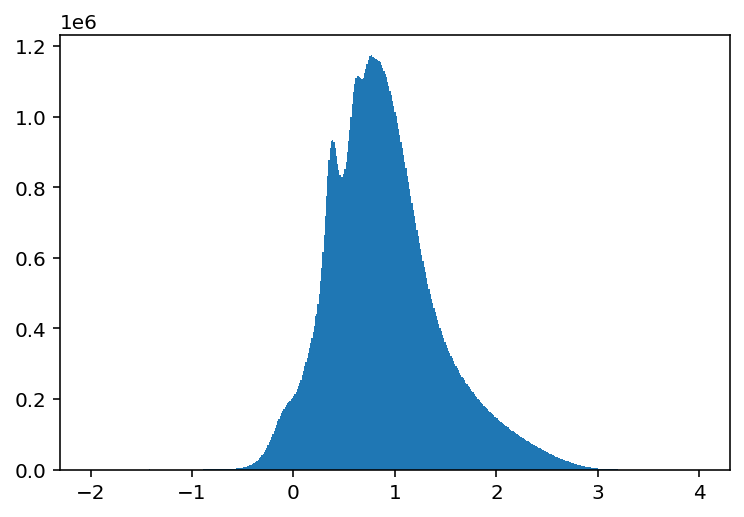

In [5]:
data = slimeobj.data
bins=np.linspace(-2,4, 500)
plt.hist(data.ravel(), bins=bins);

In [6]:
data = np.where(~np.isinf(data), data, -5)


In [7]:
def image_slime(slimeobj, ra, dec, redshift):
    data = slimeobj.data
    data = np.where(~np.isinf(data), data, -5)
    
    ymin = 0
    ymax = data.shape[0]
    xmin = 0
    xmax = data.shape[1]
    zmin = 0
    zmax = data.shape[2]
    slicedata = data[ymin:ymax, xmin:xmax, zmin:zmax]
    smashslice = np.sum(slicedata, axis=2)

    x, y, z = pu.transform_to_cartesian(ra, dec, redshift)
    yidx, xidx, zidx = slimeobj.cartesian_to_idx(x, y, z)
    xcut, ycut = xidx[(zidx > zmin) & (zidx <= zmax)], yidx[(zidx >= zmin) & (zidx < zmax)]
    
    plt.figure(figsize=(15,15))
    plt.imshow(smashslice, origin='lower', cmap='gray', vmin=-5000, vmax=100)
    plt.scatter(xcut, ycut, s=0.01, c='green')



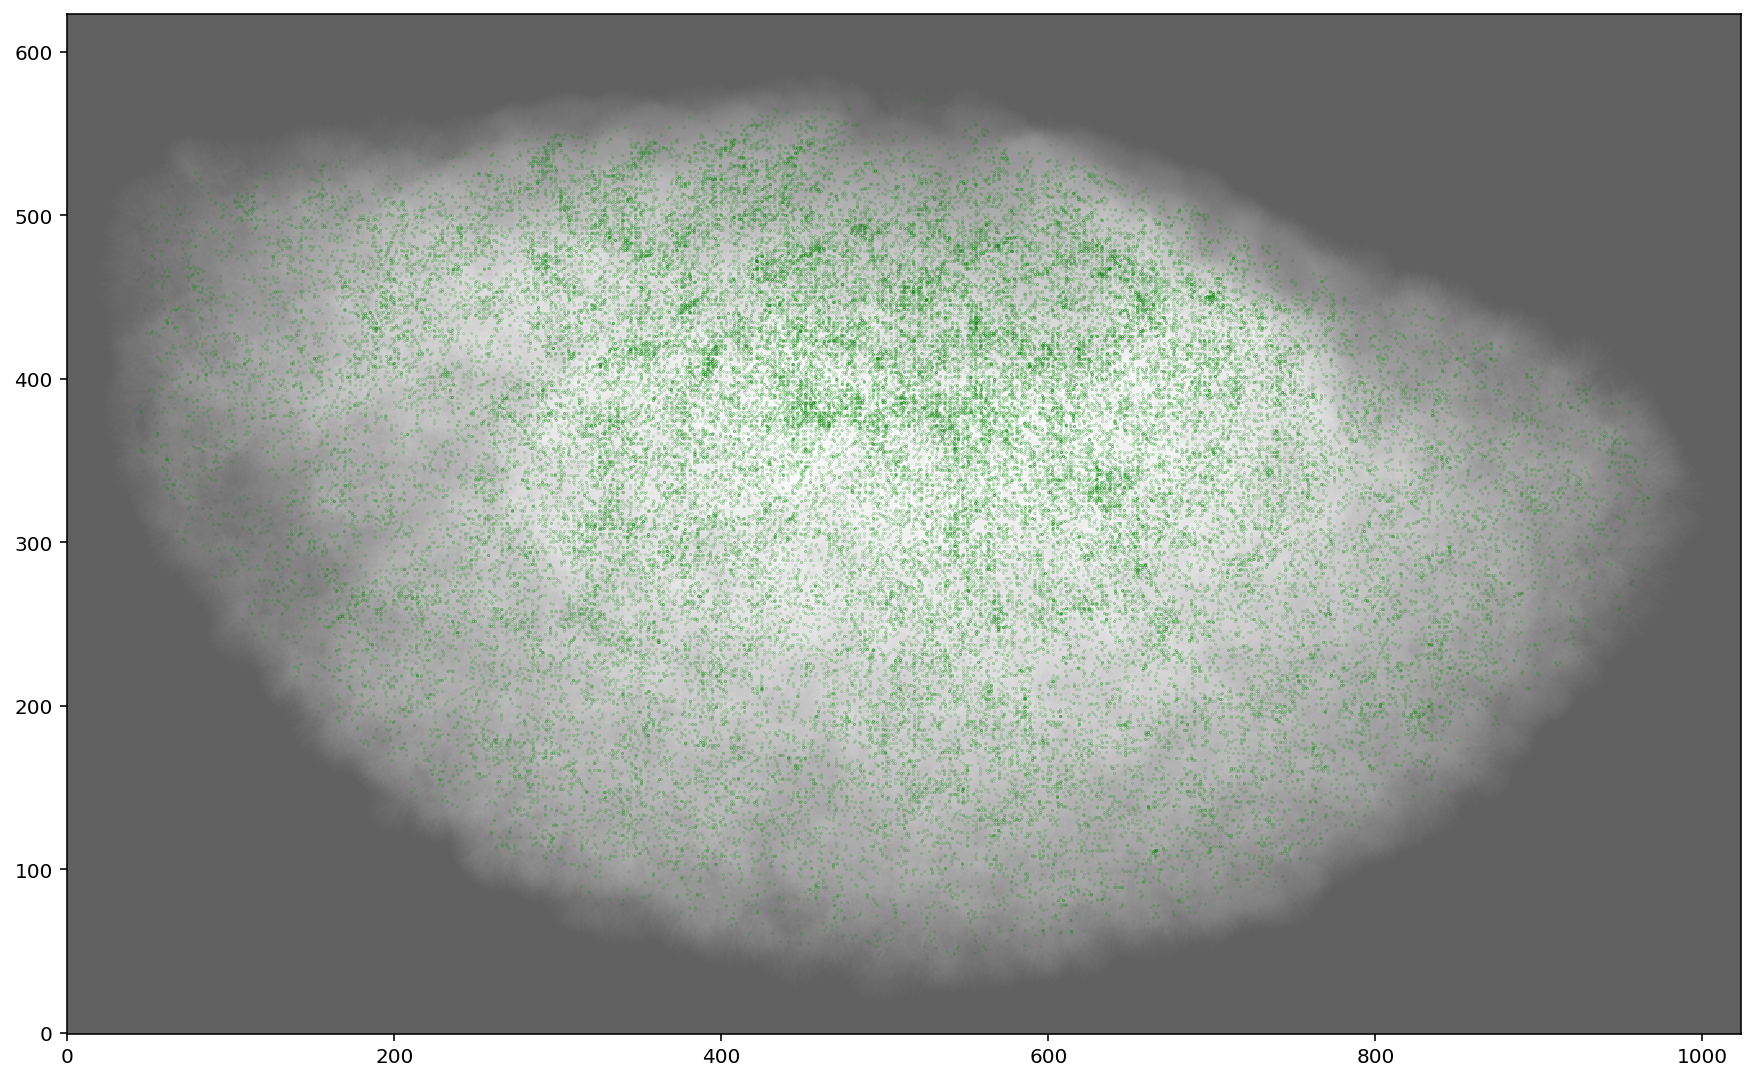

In [8]:
image_slime(slimeobj, ra, dec, redshift)


In [9]:
galtrace = slimeobj.sky_to_data(ra, 
                                dec,
                                redshift, check_bounds=True)



0

In [17]:

if "NGC" in slimeobj.name:
    print(slimeobj.name)


/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/LRG_NGC_z=0-1000mpc


TypeError: hist() missing 1 required positional argument: 'x'

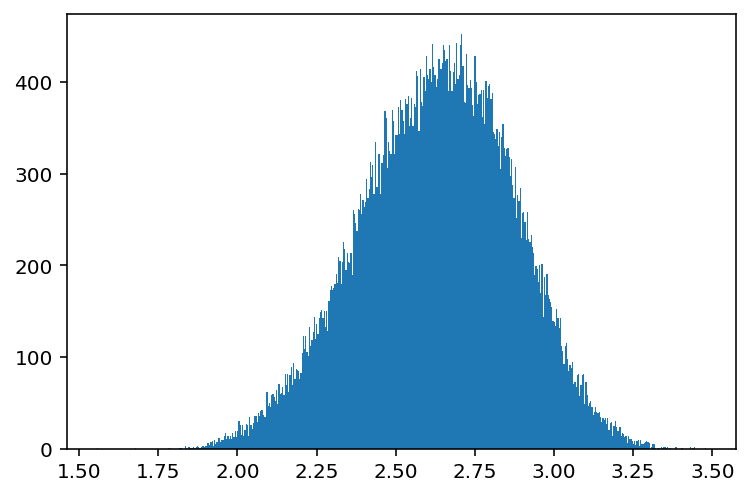

In [11]:
pipedatadir = "/Users/mwilde/python/pyslime/pyslime/pipeline/data/"
mapfunc0, mapfunc5 = catalogs.load_mapfuncs(pipedatadir)

kwargs = {"histtype":"step"}
plt.hist(galtrace, bins=500);

/Users/mwilde/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


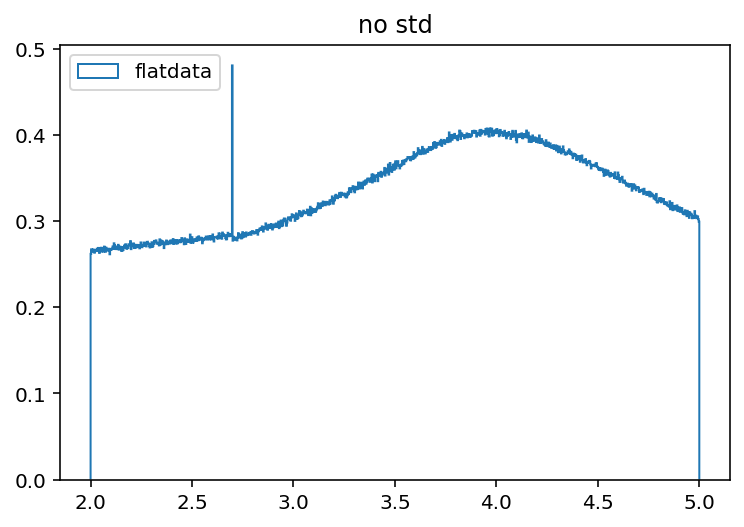

In [ ]:

flatdata = slimeobj.data.flatten()
bins = np.linspace(2, 5, 1000)
kwargs = {"bins":bins, "histtype":"step", "density":True}
# plt.axvline()
# plt.hist(flatbpslime[::50], **kwargs, label="bpSlime")
galtrace = slimeobj.sky_to_data(ra, 
                                dec,
                                redshift, check_bounds=True)
plt.hist(flatdata, **kwargs, label="flatdata")
plt.hist(galtrace, **kwargs);

plt.legend(loc='upper left')
plt.title("no std");
